In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate


In [21]:
path = Path(os.getcwd())/'data';path

PosixPath('/home/ubuntu/projects/dermai/data')

In [22]:
path.ls()

[PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-91.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-389.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-68.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-Hand-206.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-191.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-345.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Seborrheic-Keratoses-Ruff-43.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Psoriasis-Chronic-Plaque-276.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-174.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Seborrheic-Keratoses-Ruff-129.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Seborrheic-Dermatitis-75.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Seborrheic-Dermatitis-237.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Psoriasis-Chronic-Plaque-256.jpg'),
 PosixPath('/ho

In [23]:
fnames = get_image_files(path)

In [24]:
fnames[:5]

[PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-91.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-389.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-68.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-Hand-206.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-191.jpg')]

In [25]:
np.random.seed(2)
pat = re.compile(r'([\w-]+)-\d+\.jpg$')


In [26]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms = get_transforms(),
                                  size=224, bs=64).normalize(imagenet_stats)

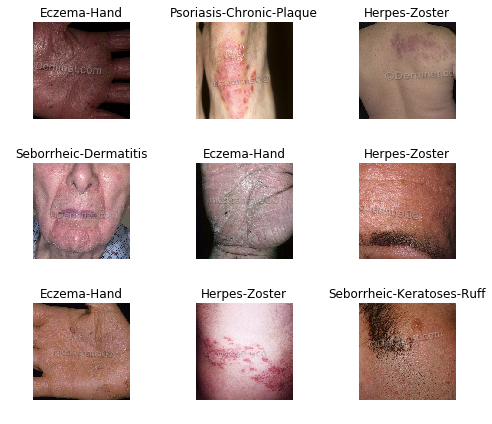

In [28]:
data.show_batch(rows=3, figsize=(7,6))

In [29]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

In [30]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [31]:
learn.fit_one_cycle(4)

Total time: 01:28
epoch  train_loss  valid_loss  error_rate
1      1.580836    0.902843    0.300199    (00:24)
2      1.206807    0.699912    0.248509    (00:21)
3      0.957555    0.645907    0.224652    (00:21)
4      0.823352    0.629565    0.212724    (00:21)



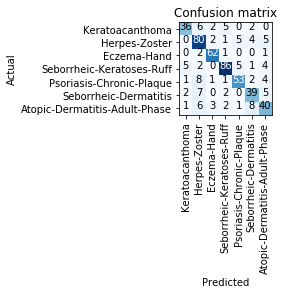

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(9 , )